## Problem Statement
 

### Business Problem Overview

In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

 

For many incumbent operators, retaining high profitable customers is the number one business goal.

 

To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.

 

In this project, we will analyse customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn and identify the main indicators of churn.

## 1.Data Understanding

In [1]:
# Import the required libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_columns', None) # To view all the columns of the dataset

In [2]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Reading the data
telecom_churn = pd.read_csv('E:\IvyPro\python/telecom_churn_data.csv')
telecom_churn.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [4]:
telecom_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


In [5]:
# Display statistics
telecom_churn.describe(include='all')

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999,99398,98899,98340,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000

In [6]:
# Rows & Columns
telecom_churn.shape

(99999, 226)

In [7]:
# Drop duplicate rows if any
telecom_churn = telecom_churn.drop_duplicates()
telecom_churn.shape

(99999, 226)

## 2. Data Cleaning


In [8]:
# create column name list by types of columns
id_cols = ['mobile_number', 'circle_id']

date_cols = ['last_date_of_month_6',
             'last_date_of_month_7',
             'last_date_of_month_8',
             'last_date_of_month_9',
             'date_of_last_rech_6',
             'date_of_last_rech_7',
             'date_of_last_rech_8',
             'date_of_last_rech_9',
             'date_of_last_rech_data_6',
             'date_of_last_rech_data_7',
             'date_of_last_rech_data_8',
             'date_of_last_rech_data_9'
            ]

n_col=[]
for i in telecom_churn.columns:
    if i not in id_cols+ date_cols:
        n_col.append(i)

#num_cols = [column for column in telecom_churn.columns if column not in id_cols + date_cols]       
                             
# print the number of columns in each list
print("#ID cols: %d\n#Date cols:%d\n#Numeric cols:%d\n" % (len(id_cols), len(date_cols), len(n_col)))

# check if we have missed any column or not
print(len(id_cols) + len(date_cols) + len(n_col) == telecom_churn.shape[1])



#ID cols: 2
#Date cols:12
#Numeric cols:212

True


In [9]:
len(n_col)

212

### 2.1 Analysing missing values 

In [10]:
telecom_churn.isnull().sum()

mobile_number        0
circle_id            0
loc_og_t2o_mou    1018
std_og_t2o_mou    1018
loc_ic_t2o_mou    1018
                  ... 
aon                  0
aug_vbc_3g           0
jul_vbc_3g           0
jun_vbc_3g           0
sep_vbc_3g           0
Length: 226, dtype: int64

In [30]:
# Columns with most number of missing values
pd.options.display.max_rows = 4000

telecom_churn.isnull().sum().reset_index().rename({0:'Number of NaN values'},axis=1).sort_values('Number of NaN values',ascending=False)



,index,Number of NaN values
189,arpu_3g_6,74846
197,night_pck_user_6,74846
161,total_rech_data_6,74846
193,arpu_2g_6,74846
165,max_rech_data_6,74846
217,fb_user_6,74846
177,av_rech_amt_data_6,74846
157,date_of_last_rech_data_6,74846
169,count_rech_2g_6,74846
173,count_rech_3g_6,74846


In [11]:
# Percentage of missing values column-wise
pd.options.display.max_rows = 4000

round(telecom_churn.isnull().sum()/len(telecom_churn.index)*100,2).sort_values(ascending=False)

count_rech_2g_6             74.85
date_of_last_rech_data_6    74.85
count_rech_3g_6             74.85
av_rech_amt_data_6          74.85
max_rech_data_6             74.85
total_rech_data_6           74.85
arpu_3g_6                   74.85
arpu_2g_6                   74.85
night_pck_user_6            74.85
fb_user_6                   74.85
arpu_3g_7                   74.43
count_rech_2g_7             74.43
fb_user_7                   74.43
count_rech_3g_7             74.43
arpu_2g_7                   74.43
av_rech_amt_data_7          74.43
max_rech_data_7             74.43
night_pck_user_7            74.43
total_rech_data_7           74.43
date_of_last_rech_data_7    74.43
night_pck_user_9            74.08
date_of_last_rech_data_9    74.08
fb_user_9                   74.08
arpu_2g_9                   74.08
max_rech_data_9             74.08
arpu_3g_9                   74.08
total_rech_data_9           74.08
av_rech_amt_data_9          74.08
count_rech_3g_9             74.08
count_rech_2g_

We can see good number of missing values in the dataset.And we need to treat them accordingly.
Before that let's identify features with single or unique value, because they won't be significant and we can Drop them.

### 2.2 Handling Missing Data

#### 2.2.1 Checking colums with a single Unique values and removing them

In [12]:
unique_cols = pd.DataFrame(telecom_churn.nunique()).reset_index().rename(columns = {'index': 'feature', 0: 'nunique'})
print(unique_cols[unique_cols['nunique'] == 1])
print('There are %d features with unique value.\n' % len(unique_cols[unique_cols['nunique'] == 1]))


                  feature  nunique
1               circle_id        1
2          loc_og_t2o_mou        1
3          std_og_t2o_mou        1
4          loc_ic_t2o_mou        1
5    last_date_of_month_6        1
6    last_date_of_month_7        1
7    last_date_of_month_8        1
8    last_date_of_month_9        1
61       std_og_t2c_mou_6        1
62       std_og_t2c_mou_7        1
63       std_og_t2c_mou_8        1
64       std_og_t2c_mou_9        1
113      std_ic_t2o_mou_6        1
114      std_ic_t2o_mou_7        1
115      std_ic_t2o_mou_8        1
116      std_ic_t2o_mou_9        1
There are 16 features with unique value.



In [13]:
telecom_churn = telecom_churn.drop(columns = list(unique_cols[unique_cols['nunique'] == 1]['feature']))

In [14]:
#unique_cols.loc[unique_cols['nunique']==1,'feature']

In [15]:
telecom_churn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99999 entries, 0 to 99998
Columns: 210 entries, mobile_number to sep_vbc_3g
dtypes: float64(168), int64(34), object(8)
memory usage: 161.0+ MB


####  2.2.2 Imputing missing values with 0

Let's start with one of the highest missing feature arpu_3g_6

In [16]:
telecom_churn['arpu_3g_6'].isna().sum()/len(telecom_churn)

0.7484674846748467

~74% of the data is missing.
How can we impute them? using mean or median etc;
Lets Check :

In [17]:
telecom_churn['arpu_3g_6'].describe()

count    25153.000000
mean        89.555057
std        193.124653
min        -30.820000
25%          0.000000
50%          0.480000
75%        122.070000
max       6362.280000
Name: arpu_3g_6, dtype: float64

We can observe that the range is huge.
We can't go with either mean or median as they can skew/distort the whole scenario.
Let's check all variables with 74% missing values of 6th month to decide on filling up the missing values.

In [18]:
telecom_churn[telecom_churn['arpu_3g_6'].isna()][['date_of_last_rech_data_6','total_rech_data_6','max_rech_data_6',
                        'count_rech_2g_6', 'count_rech_3g_6', 'av_rech_amt_data_6', 
                        'arpu_2g_6','night_pck_user_6','fb_user_6'
                    ]]



,date_of_last_rech_data_6,total_rech_data_6,max_rech_data_6,count_rech_2g_6,count_rech_3g_6,av_rech_amt_data_6,arpu_2g_6,night_pck_user_6,fb_user_6
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
99991,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99992,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99993,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99994,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


We can infer that the customers hasn't bought the data at all.
So we can fill the null values as 0 for all these variables.

In [19]:
telecom_churn['arpu_3g_6'].fillna(0,inplace=True)

In [20]:
telecom_churn['arpu_3g_6'].isna().sum()


0

In [21]:
Month_6_cols = ['arpu_3g_6','date_of_last_rech_data_6','total_rech_data_6','max_rech_data_6','count_rech_2g_6', 
                'count_rech_3g_6', 'av_rech_amt_data_6', 'arpu_2g_6','night_pck_user_6','fb_user_6']

telecom_churn[Month_6_cols] = telecom_churn[Month_6_cols].apply(lambda x: x.fillna(0))

Similarly we can repeat it for the 7th,8th, 9th month features that have high missing values(74% missing values across the 7th month and 73% missing values across the 8th month)

In [22]:
telecom_churn[telecom_churn['arpu_3g_7'].isna()][['date_of_last_rech_data_7','total_rech_data_7','max_rech_data_7',
                        'count_rech_2g_7', 'count_rech_3g_7', 'av_rech_amt_data_7', 
                        'arpu_2g_7','night_pck_user_7','fb_user_7']]

,date_of_last_rech_data_7,total_rech_data_7,max_rech_data_7,count_rech_2g_7,count_rech_3g_7,av_rech_amt_data_7,arpu_2g_7,night_pck_user_7,fb_user_7
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
99993,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99994,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
Month_789_cols= ['arpu_3g_7','date_of_last_rech_data_7','total_rech_data_7','max_rech_data_7','count_rech_2g_7', 
                'count_rech_3g_7', 'av_rech_amt_data_7', 'arpu_2g_7','night_pck_user_7','fb_user_7','arpu_3g_8','date_of_last_rech_data_8','total_rech_data_8','max_rech_data_8','count_rech_2g_8', 
                'count_rech_3g_8', 'av_rech_amt_data_8', 'arpu_2g_8','night_pck_user_8','fb_user_8', 'arpu_3g_9','date_of_last_rech_data_9','total_rech_data_9','max_rech_data_9','count_rech_2g_9', 
                'count_rech_3g_9', 'av_rech_amt_data_9', 'arpu_2g_9','night_pck_user_9','fb_user_9']

telecom_churn[Month_789_cols] = telecom_churn[Month_789_cols].apply(lambda x: x.fillna(0))


In [24]:
# Percentage of missing values column-wise
pd.options.display.max_rows = 4000
round(telecom_churn.isnull().sum()/len(telecom_churn.index)*100,2)

mobile_number               0.00
arpu_6                      0.00
arpu_7                      0.00
arpu_8                      0.00
arpu_9                      0.00
onnet_mou_6                 3.94
onnet_mou_7                 3.86
onnet_mou_8                 5.38
onnet_mou_9                 7.75
offnet_mou_6                3.94
offnet_mou_7                3.86
offnet_mou_8                5.38
offnet_mou_9                7.75
roam_ic_mou_6               3.94
roam_ic_mou_7               3.86
roam_ic_mou_8               5.38
roam_ic_mou_9               7.75
roam_og_mou_6               3.94
roam_og_mou_7               3.86
roam_og_mou_8               5.38
roam_og_mou_9               7.75
loc_og_t2t_mou_6            3.94
loc_og_t2t_mou_7            3.86
loc_og_t2t_mou_8            5.38
loc_og_t2t_mou_9            7.75
loc_og_t2m_mou_6            3.94
loc_og_t2m_mou_7            3.86
loc_og_t2m_mou_8            5.38
loc_og_t2m_mou_9            7.75
loc_og_t2f_mou_6            3.94
loc_og_t2f

####  2.2.3 Imputing remaining missing values

In [25]:
def getMissingValues(missingCutoff):
    # Function to retun the columns with more than missingCutoff% missing values.
    # argument: missingCutoff, % values threshold for missing values
    missing = round(100*(telecom_churn.isnull().sum()/telecom_churn.shape[0]))
    print("There are {} features having more than {}% missing values/entries".format(len(missing.loc[missing > missingCutoff]),missingCutoff))
    return missing.loc[missing > missingCutoff]


In [26]:
# Missing values per column expressed as % of total number of values > 5%
getMissingValues(5)

There are 27 features having more than 5% missing values/entries


onnet_mou_9         8.0
offnet_mou_9        8.0
roam_ic_mou_9       8.0
roam_og_mou_9       8.0
loc_og_t2t_mou_9    8.0
loc_og_t2m_mou_9    8.0
loc_og_t2f_mou_9    8.0
loc_og_t2c_mou_9    8.0
loc_og_mou_9        8.0
std_og_t2t_mou_9    8.0
std_og_t2m_mou_9    8.0
std_og_t2f_mou_9    8.0
std_og_mou_9        8.0
isd_og_mou_9        8.0
spl_og_mou_9        8.0
og_others_9         8.0
loc_ic_t2t_mou_9    8.0
loc_ic_t2m_mou_9    8.0
loc_ic_t2f_mou_9    8.0
loc_ic_mou_9        8.0
std_ic_t2t_mou_9    8.0
std_ic_t2m_mou_9    8.0
std_ic_t2f_mou_9    8.0
std_ic_mou_9        8.0
spl_ic_mou_9        8.0
isd_ic_mou_9        8.0
ic_others_9         8.0
dtype: float64

Looks like all these features for the month sep(9) are missing together. Let's check.

In [27]:
# checking if all these above features go missing together since they have the same 8% missing values in each feature.
missingcol = list(getMissingValues(5).index)
print ("There are %d customers/MSISDN's having missing values for %s together"%(len(telecom_churn[telecom_churn[missingcol].isnull().all(axis=1)]),missingcol))
telecom_churn[telecom_churn[missingcol].isnull().all(axis=1)][missingcol].head()


There are 27 features having more than 5% missing values/entries
There are 7745 customers/MSISDN's having missing values for ['onnet_mou_9', 'offnet_mou_9', 'roam_ic_mou_9', 'roam_og_mou_9', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_9', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_9', 'loc_og_mou_9', 'std_og_t2t_mou_9', 'std_og_t2m_mou_9', 'std_og_t2f_mou_9', 'std_og_mou_9', 'isd_og_mou_9', 'spl_og_mou_9', 'og_others_9', 'loc_ic_t2t_mou_9', 'loc_ic_t2m_mou_9', 'loc_ic_t2f_mou_9', 'loc_ic_mou_9', 'std_ic_t2t_mou_9', 'std_ic_t2m_mou_9', 'std_ic_t2f_mou_9', 'std_ic_mou_9', 'spl_ic_mou_9', 'isd_ic_mou_9', 'ic_others_9'] together


,onnet_mou_9,offnet_mou_9,roam_ic_mou_9,roam_og_mou_9,loc_og_t2t_mou_9,loc_og_t2m_mou_9,loc_og_t2f_mou_9,loc_og_t2c_mou_9,loc_og_mou_9,std_og_t2t_mou_9,std_og_t2m_mou_9,std_og_t2f_mou_9,std_og_mou_9,isd_og_mou_9,spl_og_mou_9,og_others_9,loc_ic_t2t_mou_9,loc_ic_t2m_mou_9,loc_ic_t2f_mou_9,loc_ic_mou_9,std_ic_t2t_mou_9,std_ic_t2m_mou_9,std_ic_t2f_mou_9,std_ic_mou_9,spl_ic_mou_9,isd_ic_mou_9,ic_others_9
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Yes, It looks like for 7745 Customers all these features are empty together without any value. We can choose to impute these values with 0 also.

In [28]:
Month_9_cols= ['onnet_mou_9', 'offnet_mou_9', 'roam_ic_mou_9', 'roam_og_mou_9', 'loc_og_t2t_mou_9', 
               'loc_og_t2m_mou_9', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_9', 'loc_og_mou_9', 'std_og_t2t_mou_9', 
               'std_og_t2m_mou_9', 'std_og_t2f_mou_9', 'std_og_mou_9', 'isd_og_mou_9', 
               'spl_og_mou_9', 'og_others_9', 'loc_ic_t2t_mou_9', 'loc_ic_t2m_mou_9', 'loc_ic_t2f_mou_9', 
               'loc_ic_mou_9', 'std_ic_t2t_mou_9', 'std_ic_t2m_mou_9', 'std_ic_t2f_mou_9', 'std_ic_mou_9', 
               'spl_ic_mou_9', 'isd_ic_mou_9', 'ic_others_9']

telecom_churn[Month_9_cols] = telecom_churn[Month_9_cols].apply(lambda x: x.fillna(0))

In [29]:
# Missing values per column expressed as % of total number of values > 2%
getMissingValues(2)

There are 83 features having more than 2% missing values/entries


onnet_mou_6            4.0
onnet_mou_7            4.0
onnet_mou_8            5.0
offnet_mou_6           4.0
offnet_mou_7           4.0
offnet_mou_8           5.0
roam_ic_mou_6          4.0
roam_ic_mou_7          4.0
roam_ic_mou_8          5.0
roam_og_mou_6          4.0
roam_og_mou_7          4.0
roam_og_mou_8          5.0
loc_og_t2t_mou_6       4.0
loc_og_t2t_mou_7       4.0
loc_og_t2t_mou_8       5.0
loc_og_t2m_mou_6       4.0
loc_og_t2m_mou_7       4.0
loc_og_t2m_mou_8       5.0
loc_og_t2f_mou_6       4.0
loc_og_t2f_mou_7       4.0
loc_og_t2f_mou_8       5.0
loc_og_t2c_mou_6       4.0
loc_og_t2c_mou_7       4.0
loc_og_t2c_mou_8       5.0
loc_og_mou_6           4.0
loc_og_mou_7           4.0
loc_og_mou_8           5.0
std_og_t2t_mou_6       4.0
std_og_t2t_mou_7       4.0
std_og_t2t_mou_8       5.0
std_og_t2m_mou_6       4.0
std_og_t2m_mou_7       4.0
std_og_t2m_mou_8       5.0
std_og_t2f_mou_6       4.0
std_og_t2f_mou_7       4.0
std_og_t2f_mou_8       5.0
std_og_mou_6           4.0
s

In [30]:
missingcol = list(getMissingValues(2).index)
print ("There are %d customers/MSISDN's having missing values for %s together"%(len(telecom_churn[telecom_churn[missingcol].isnull().all(axis=1)]),missingcol))
telecom_churn[telecom_churn[missingcol].isnull().all(axis=1)][missingcol].head()


There are 83 features having more than 2% missing values/entries
There are 381 customers/MSISDN's having missing values for ['onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2f_mou_6', 'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_mou_6', 'std_og_mou_7', 'std_og_mou_8', 'isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8', 'spl_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_8', 'og_others_6', 'og_others_7', 'og_others_8', 'loc_ic_t2t_mou_6', 'lo

,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,date_of_last_rech_8,date_of_last_rech_9
202,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
275,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
687,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1206,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1232,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


It looks like there are 381 Customers for whom all these features are without any value. Let's drop these customers from the data.



In [31]:
telecom_churn=telecom_churn[~telecom_churn[missingcol].isnull().all(axis=1)]
telecom_churn.shape

(99618, 210)

In [32]:
# For other customers where these missing values are spread out, let's also impute them with zero. 
remaining_cols= ['onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8', 
                 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_og_mou_6', 'roam_og_mou_7', 
                 'roam_og_mou_8','loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_6', 
                 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8',
                 'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_mou_6', 'loc_og_mou_7', 
                 'loc_og_mou_8', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6', 
                 'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2f_mou_6', 'std_og_t2f_mou_7', 
                 'std_og_t2f_mou_8', 'std_og_mou_6', 'std_og_mou_7', 'std_og_mou_8', 'isd_og_mou_6', 
                 'isd_og_mou_7', 'isd_og_mou_8', 'spl_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_8', 'og_others_6', 
                 'og_others_7', 'og_others_8', 'loc_ic_t2t_mou_6', 'loc_ic_t2t_mou_7', 'loc_ic_t2t_mou_8', 
                 'loc_ic_t2m_mou_6', 'loc_ic_t2m_mou_7', 'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_6', 'loc_ic_t2f_mou_7',
                 'loc_ic_t2f_mou_8', 'loc_ic_mou_6', 'loc_ic_mou_7', 'loc_ic_mou_8', 'std_ic_t2t_mou_6', 
                 'std_ic_t2t_mou_7', 'std_ic_t2t_mou_8', 'std_ic_t2m_mou_6', 'std_ic_t2m_mou_7', 
                 'std_ic_t2m_mou_8', 'std_ic_t2f_mou_6', 'std_ic_t2f_mou_7', 'std_ic_t2f_mou_8', 
                 'std_ic_mou_6', 'std_ic_mou_7', 'std_ic_mou_8', 'spl_ic_mou_6', 'spl_ic_mou_7', 
                 'spl_ic_mou_8', 'isd_ic_mou_6', 'isd_ic_mou_7', 'isd_ic_mou_8', 
                 'ic_others_6', 'ic_others_7', 'ic_others_8', 'date_of_last_rech_8', 'date_of_last_rech_9']

telecom_churn[remaining_cols] = telecom_churn[remaining_cols].apply(lambda x: x.fillna(0))

In [33]:
getMissingValues(0)

There are 2 features having more than 0% missing values/entries


date_of_last_rech_6    1.0
date_of_last_rech_7    1.0
dtype: float64

In [34]:
# All these features are missing together
missingcol = list(getMissingValues(0).index)
print ("There are %d rows in total having missing values for these variables."%(len(telecom_churn[telecom_churn[missingcol].isnull().all(axis=1)])))


There are 2 features having more than 0% missing values/entries
There are 113 rows in total having missing values for these variables.


Lets impute these missing values with the maximum date that can be assigned in that particular month.

In [35]:
telecom_churn[telecom_churn['date_of_last_rech_6'].isnull()]['date_of_last_rech_6'] = '6/30/2014'
telecom_churn[telecom_churn['date_of_last_rech_7'].isnull()]['date_of_last_rech_7'] = '7/31/2014'

In [36]:
# Checking Percentage of missing values again to make sure we have imputed all the missing values
pd.options.display.max_rows = 4000
round(telecom_churn.isnull().sum()/len(telecom_churn.index)*100,2)

mobile_number               0.00
arpu_6                      0.00
arpu_7                      0.00
arpu_8                      0.00
arpu_9                      0.00
onnet_mou_6                 0.00
onnet_mou_7                 0.00
onnet_mou_8                 0.00
onnet_mou_9                 0.00
offnet_mou_6                0.00
offnet_mou_7                0.00
offnet_mou_8                0.00
offnet_mou_9                0.00
roam_ic_mou_6               0.00
roam_ic_mou_7               0.00
roam_ic_mou_8               0.00
roam_ic_mou_9               0.00
roam_og_mou_6               0.00
roam_og_mou_7               0.00
roam_og_mou_8               0.00
roam_og_mou_9               0.00
loc_og_t2t_mou_6            0.00
loc_og_t2t_mou_7            0.00
loc_og_t2t_mou_8            0.00
loc_og_t2t_mou_9            0.00
loc_og_t2m_mou_6            0.00
loc_og_t2m_mou_7            0.00
loc_og_t2m_mou_8            0.00
loc_og_t2m_mou_9            0.00
loc_og_t2f_mou_6            0.00
loc_og_t2f

We are good enough with the data cleaning and will proceed with the further steps.

In [37]:
# Percentage of data left after treating the missing values.
print("Percentage of data remaining after treating missing values: {}%".format(round(telecom_churn.shape[0]/99999 *100,2)))
print ("Number of customers: {}".format(telecom_churn.shape[0]))
print ("Number of features: {}".format(telecom_churn.shape[1]))


Percentage of data remaining after treating missing values: 99.62%
Number of customers: 99618
Number of features: 210


## 3. Filtering High Value Customers

In [38]:
# calculate the total data recharge amount for June and July --> number of recharges * average recharge amount
telecom_churn['total_data_rech_6'] = telecom_churn.total_rech_data_6 * telecom_churn.av_rech_amt_data_6
telecom_churn['total_data_rech_7'] = telecom_churn.total_rech_data_7 * telecom_churn.av_rech_amt_data_7

# calculate total recharge amount for June and July --> call recharge amount + data recharge amount
telecom_churn['amt_data_6'] = telecom_churn.total_rech_amt_6 + telecom_churn.total_data_rech_6
telecom_churn['amt_data_7'] = telecom_churn.total_rech_amt_7 + telecom_churn.total_data_rech_7


# calculate average recharge done by customer in June and July
telecom_churn['av_amt_data_6_7'] = (telecom_churn.amt_data_6 + telecom_churn.amt_data_7)/2

In [39]:
telecom_churn.head()

,mobile_number,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_data_rech_6,total_data_rech_7,amt_data_6,amt_data_7,av_amt_data_6_7
0,7000842753,197.385,214.816,213.803,21.100,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.16,0.00,0.00,0.00,4.13,0.00,0.00,0.00,1.15,0.00,0.00,0.00,5.44,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.44,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.00,4,3,2,6,362,252,252,0,252,252,252,0,6/21/2014,7/16/2014,8/8/2014,9/28/2014,252,252,252,0,6/21/2014,7/16/2014,8/8/2014,0,1.0,1.0,1.0,0.0,252.0,252.0,252.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,252.0,252.0,252.0,0.0,30.13,1.32

In [40]:
# look at the 70th percentile recharge amount
print("Recharge amount at 70th percentile: {0}".format(telecom_churn.av_amt_data_6_7.quantile(0.7)))

Recharge amount at 70th percentile: 479.5


In [41]:
# retain only those customers who have recharged their mobiles with more than or equal to 70th percentile amount
telecom_churn_filtered = telecom_churn.loc[telecom_churn.av_amt_data_6_7 >= telecom_churn.av_amt_data_6_7.quantile(0.7), :]
telecom_churn_filtered = telecom_churn_filtered.reset_index(drop=True)
telecom_churn_filtered.shape


(29906, 215)

In [42]:
telecom_churn_filtered.head()

,mobile_number,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_data_rech_6,total_data_rech_7,amt_data_6,amt_data_7,av_amt_data_6_7
0,7000842753,197.385,214.816,213.803,21.100,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.16,0.00,0.00,0.00,4.13,0.00,0.00,0.00,1.15,0.00,0.00,0.00,5.44,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,5.44,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,4,3,2,6,362,252,252,0,252,252,252,0,6/21/2014,7/16/2014,8/8/2014,9/28/2014,252,252,252,0,6/21/2014,7/16/2014,8/8/2014,0,1.0,1.0,1.0,0.0,252.0,252.0,252.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,252.0,252.0,252.0,0.0,30.13,1.32,5.

## 4.Derive Churn

In [43]:
# calculate total incoming and outgoing minutes of usage
telecom_churn_filtered['total_calls_mou_9'] = telecom_churn_filtered.total_ic_mou_9 + telecom_churn_filtered.total_og_mou_9

# calculate 2g and 3g data consumption
telecom_churn_filtered['total_internet_mb_9'] =  telecom_churn_filtered.vol_2g_mb_9 + telecom_churn_filtered.vol_3g_mb_9

# create telecom_churn variable: those who have not used either calls or internet in the month of September are customers who have telecom_churned
# 0 - not telecom_churn, 1 - telecom_churn
telecom_churn_filtered['churn'] = telecom_churn_filtered.apply(lambda row: 1 if (row.total_calls_mou_9 == 0 and row.total_internet_mb_9 == 0) else 0, axis=1)

#change data type to category
telecom_churn_filtered.churn = telecom_churn_filtered.churn.astype("category")

# print telecom_churn ratio
print("Churn Ratio:")
print(telecom_churn_filtered.churn.value_counts()*100/telecom_churn_filtered.shape[0])


Churn Ratio:
0    91.914666
1     8.085334
Name: churn, dtype: float64


The flags 0 & 1 are Non-churn and churn respectively.There are just 8.08% churn cases.So, we can infer that the dataset is an imbalanced one, where the churn cases are the minority(8.08%) as opposed to the non-churners who are the majority(91.91%)

In [44]:
# deleting columns that belong to churn month(sep-9)
telecom_churn_filtered = telecom_churn_filtered.drop(telecom_churn_filtered.filter(regex='_9|sep', axis = 1).columns, axis=1)


In [45]:
telecom_churn_filtered.head()

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,total_data_rech_6,total_data_rech_7,amt_data_6,amt_data_7,av_amt_data_6_7,churn
0,7000842753,197.385,214.816,213.803,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.16,0.00,0.00,4.13,0.00,0.00,1.15,0.00,0.00,5.44,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.44,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,4,3,2,362,252,252,252,252,252,6/21/2014,7/16/2014,8/8/2014,252,252,252,6/21/2014,7/16/2014,8/8/2014,1.0,1.0,1.0,252.0,252.0,252.0,0.0,0.0,0.0,1.0,1.0,1.0,252.0,252.0,252.0,30.13,1.32,5.75,83.57,150.76,109.61,212.17,212.17,212.17,212.17,212.17,212.17,0.0,0.0,0.0,0,0,0,0,0,0,1,1,1,0,0,0,1.0,1.0,1.0,968,30.40,0.00,101.20,252.0,252.0,614.0,504.0,559.0,1
1,7000701601,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,60.86,75.14,77.84,0.0,0.18,10.01,4.5,0.0,6.50,0.0,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,1580,790,3638,1580,790,1580,6/27/2014,7/25/2014,8/26/2014,0,0,779,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0,0,0,0

## 5.Data Preparation

#### 5.1 Creating Derived Variables and performing EDA on derived as well as original features:

Let's first start formating date features

In [46]:
telecom_churn_filtered['date_of_last_rech_6'] = pd.to_datetime(telecom_churn_filtered['date_of_last_rech_6'])
telecom_churn_filtered['date_of_last_rech_7'] = pd.to_datetime(telecom_churn_filtered['date_of_last_rech_7'])
telecom_churn_filtered['date_of_last_rech_8'] = pd.to_datetime(telecom_churn_filtered['date_of_last_rech_8'])

telecom_churn_filtered['date_of_last_rech_data_6'] = pd.to_datetime(telecom_churn_filtered['date_of_last_rech_data_6'])
telecom_churn_filtered['date_of_last_rech_data_7'] = pd.to_datetime(telecom_churn_filtered['date_of_last_rech_data_7'])
telecom_churn_filtered['date_of_last_rech_data_8'] = pd.to_datetime(telecom_churn_filtered['date_of_last_rech_data_8'])

telecom_churn_filtered['mobile_number'] = telecom_churn_filtered['mobile_number'].astype(str)

There are some monthly features which are not in the standard naming (_6,_7,_8)

In [47]:
# renaming columns,
#'jun_vbc_3g' : 'vbc_3g_6' & 'jul_vbc_3g' : 'vbc_3g_7' & 'aug_vbc_3g' : 'vbc_3g_8' &'sep_vbc_3g' : 'vbc_3g_9'
telecom_churn_filtered.rename(columns={'jun_vbc_3g' : 'vbc_3g_6', 'jul_vbc_3g' : 'vbc_3g_7', 'aug_vbc_3g' : 'vbc_3g_8',
                      'sep_vbc_3g' : 'vbc_3g_9'}, inplace=True)


Lets Define some methods for plotting graphs: 

In [48]:
#Minutes of usage - voice calls(both IC and OG) Vs Churn

def plot_byChurnMou(colList,calltype):
    fig, ax = plt.subplots(figsize=(7,4))
    df=telecom_churn_filtered.groupby(['churn'])[colList].mean().T
    plt.plot(df)
    ax.set_xticklabels(['Jun','Jul','Aug','Sep'])
    ## Add legend
    plt.legend(['Non-Churn', 'Churn'])
    # Add titles
    plt.title("Avg. "+calltype+" MOU  V/S Month", loc='left', fontsize=12, fontweight=0, color='orange')
    plt.xlabel("Month")
    plt.ylabel("Avg. "+calltype+" MOU")
    plt.show()

In [49]:
#telecom_churn_filtered.groupby(['churn'])['vbc_3g_6'].mean().T

In [50]:
#Churn Vs other features(both Derived and Original features)

def plot_byChurn(data,col):
    # per month churn vs Non-Churn
    fig, ax = plt.subplots(figsize=(7,4))
    colList=list(data.filter(regex=(col)).columns)
    colList = colList[:3]
    plt.plot(telecom_churn_filtered.groupby('churn')[colList].mean().T)
    ax.set_xticklabels(['Jun','Jul','Aug','Sep'])
    ## Add legend
    plt.legend(['Non-Churn', 'Churn'])
    # Add titles
    plt.title( str(col) +" V/S Month", loc='left', fontsize=12, fontweight=0, color='orange')
    plt.xlabel("Month")
    plt.ylabel(col)
    plt.show()
    # Numeric stats for per month churn vs Non-Churn
    return telecom_churn_filtered.groupby('churn')[colList].mean()
    

In [51]:
telecom_churn_filtered.filter(regex=('og_to_ic_mou_')).columns

Index([], dtype='object')

#### a) Feature: aon

count    29906.000000
mean      1209.062396
std        957.342718
min        180.000000
25%        460.000000
50%        846.000000
75%       1755.000000
max       4321.000000
Name: aon, dtype: float64


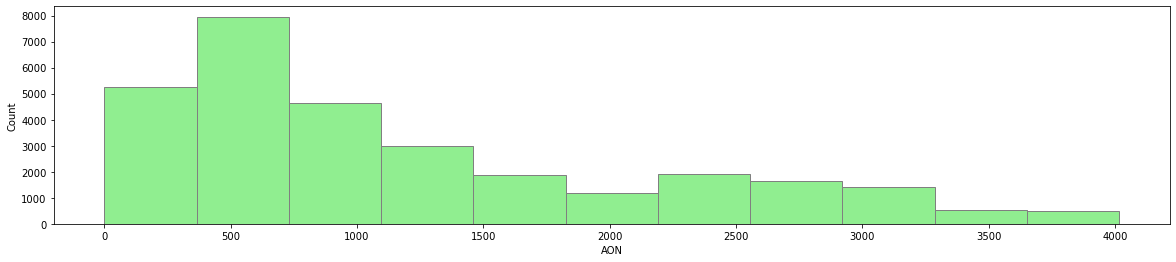

In [52]:
# Customers distribution of the age on network
print(telecom_churn_filtered.aon.describe())
fig, ax = plt.subplots(figsize=(20,4))
counts, bins, patches = ax.hist(telecom_churn_filtered['aon'],bins=range(0,telecom_churn_filtered['aon'].max(),round(365)), facecolor='lightgreen', edgecolor='gray')
ax.set_xlabel('AON')
ax.set_ylabel('Count')  
plt.show()
    
    

* Minimun Age on network is 180 days.
* Average age on network for customers is 1200 days (3.2 years).

#### b) Incoming/Outgoing MOU VS Churn

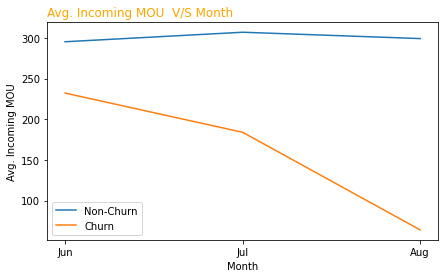

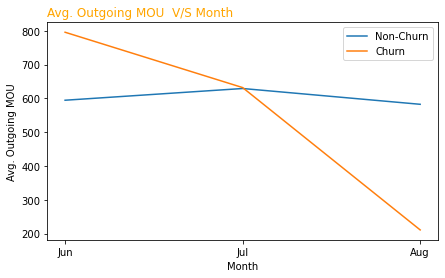

In [53]:
ic_col = ['total_ic_mou_6','total_ic_mou_7','total_ic_mou_8']
og_col = ['total_og_mou_6','total_og_mou_7','total_og_mou_8']
plot_byChurnMou(ic_col,'Incoming')
plot_byChurnMou(og_col,'Outgoing')

It can be observed,

* Churners Avg. Incoming/Outgoing MOU's drops drastically after the 2nd month,Jul.
* While the non-churners Avg. MOU's remains consistant and stable with each month.
* Therefore, users MOU is a key feature to predict churn.

#### c) Create new features: og_to_ic_mou_6, og_to_ic_mou_7, og_to_ic_mou_8 
These features will hold the ratio (=total_ogmou / total_icmou) for each month. These features will combine both incoming and outgoing informations and should be a better predictor of churn.

In [54]:
#Creating new feature: og_to_ic_mou_6, og_to_ic_mou_7, og_to_ic_mou_8
# adding 1 to denominator to avoid dividing by 0 and getting nan values.
for i in range(6,9):
    telecom_churn_filtered['og_to_ic_mou_'+str(i)] = (telecom_churn_filtered['total_og_mou_'+str(i)])/(telecom_churn_filtered['total_ic_mou_'+str(i)]+1)
    
    

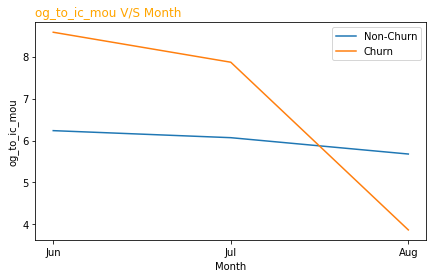

,og_to_ic_mou_6,og_to_ic_mou_7,og_to_ic_mou_8
churn,,,
0,6.235602,6.067952,5.678424
1,8.580257,7.865938,3.870145


In [55]:
plot_byChurn(telecom_churn_filtered,'og_to_ic_mou')

* Outgoing to incoming mou drops significantly for churners from month Jul(6) to Aug(7).
* While it remains almost consistent for the non-churners.


#### d) Create new feature: loc_og_to_ic_mou_6, loc_og_to_ic_mou_7, loc_og_to_ic_mou_8 
These features will hold the ratio (=loc_ogmou / loc_icmou) for each month. These features will combine the local calls, both incoming and outgoing informations and should be a better predictor of churn.

In [56]:
#Create new feature: loc_og_to_ic_mou_6, loc_og_to_ic_mou_7, loc_og_to_ic_mou_8
# adding 1 to denominator to avoid dividing by 0 and getting nan values.
for i in range(6,9):
    telecom_churn_filtered['loc_og_to_ic_mou_'+str(i)] = (telecom_churn_filtered['loc_og_mou_'+str(i)])/(telecom_churn_filtered['loc_ic_mou_'+str(i)]+1)

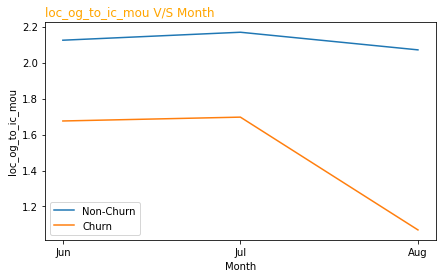

,loc_og_to_ic_mou_6,loc_og_to_ic_mou_7,loc_og_to_ic_mou_8
churn,,,
0,2.124471,2.168763,2.070806
1,1.675413,1.696809,1.069765


In [57]:
plot_byChurn(telecom_churn_filtered,'loc_og_to_ic_mou')

It can be observed that,
* The local outgoing to incoming call mou ratio is genrally low for churners right from the begining of the good phase.
* local mou pattern for the non-churners remains almost constant through out the 3 months.
* The churners genrally show a low loc mou ratio but it drops dramatically after the 2nd month.
* This might suggest that people who are not making/reciving much local calls during their tenure are more likely to churn.

#### e) Create new feature: Total_loc_mou_6, Total_loc_mou_7, Total_loc_mou_8
These features will hold the Total MOU (=loc_og_mou+loc_ic_mou) for each month.
Using this we will find if the loc MOU (both incoming and outgoing) drops or increaces as the months goes by.
This informations should be a better predictor of churn.

In [58]:
#Create new feature: Total_loc_mou_6,Total_loc_mou_7,lTotal_loc_mou_8
for i in range(6,9):
    telecom_churn_filtered['Total_loc_mou_'+str(i)] = (telecom_churn_filtered['loc_og_mou_'+str(i)])+(telecom_churn_filtered['loc_ic_mou_'+str(i)])
    
    

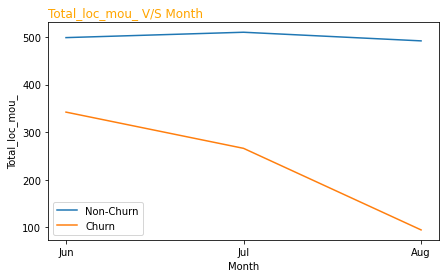

,Total_loc_mou_6,Total_loc_mou_7,Total_loc_mou_8
churn,,,
0,498.548969,509.835211,491.705600
1,342.113462,266.025666,94.701154


In [59]:
plot_byChurn(telecom_churn_filtered,'Total_loc_mou_')

It can be observed that,

* The Total local call mou is genrally low for churners right from the begining of the good phase.
* local mou pattern for the non-churners remains almost constant through out the 3 months.
* The churners genrally show a low total loc mou but it drops dramatically after the 2nd month.
* This might suggest that people who are not making/reciving much local calls during their tenure are more likely to churn.

#### f) Create new feature: Total_roam_mou_6,Total_roam_mou_7,Total_roam_mou_8
These features will hold the Total roaming MOU (=roam_ic_mou+roam_og_mou) for each month.
Using this we will find if the roam MOU (both incoming and outgoing) drops or increaces as the months goes by.
This informations should be a better predictor of churn.

In [60]:
#Create new feature: Total_roam_mou_6,Total_roam_mou_7,Total_roam_mou_8
for i in range(6,9):
    telecom_churn_filtered['Total_roam_mou_'+str(i)] = (telecom_churn_filtered['roam_ic_mou_'+str(i)])+(telecom_churn_filtered['roam_og_mou_'+str(i)])
    

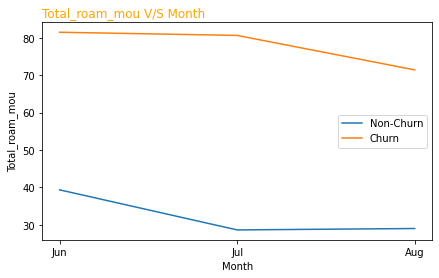

,Total_roam_mou_6,Total_roam_mou_7,Total_roam_mou_8
churn,,,
0,39.360033,28.643301,29.016734
1,81.504156,80.651973,71.443623


In [61]:
plot_byChurn(telecom_churn_filtered,'Total_roam_mou')

It can be observed that,

* Surprisingly, the roaming usage of churners is way higher than those of non-churners across all months
* People who are making/reciving more roaming calls during their tenure are more likely to churn.
* This might suggest that the operators roaming tariffs are higher than what are offered by its competitor, thus forming one of the reasons of churn.

#### h) max_rech_amt VS Churn

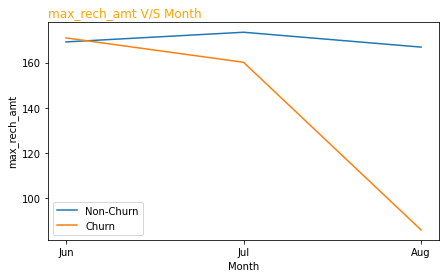

,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8
churn,,,
0,169.160943,173.437282,166.865250
1,170.930108,160.152192,86.026468


In [62]:
plot_byChurn(telecom_churn_filtered,'max_rech_amt')


* maximum recharge amount also drops significantly for churners from month Jul(6) to Aug(7).
* While it remains almost consistent for the non-churners.

#### i) arpu VS Churn

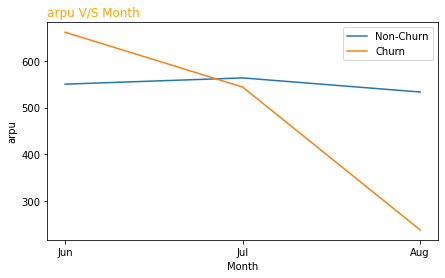

,arpu_6,arpu_7,arpu_8
churn,,,
0,549.843524,563.190828,533.052496
1,660.695411,543.722952,238.631887


In [63]:
plot_byChurn(telecom_churn_filtered,'arpu')

* Average revenue per user(arpu) also drops significantly for churners from month Jul(6) to Aug(7).
* While it remains almost consistent for the non-churners.

#### j) last_day_rch_amt VS Churn

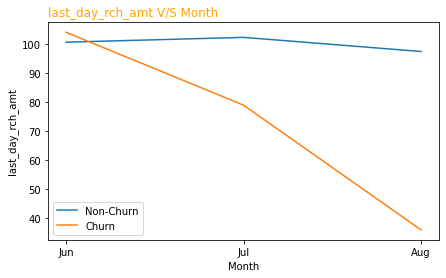

,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8
churn,,,
0,100.657232,102.318284,97.451724
1,104.085194,78.956989,35.955749


In [64]:
plot_byChurn(telecom_churn_filtered,'last_day_rch_amt')

* The avg. last recharge amount for churners is less than half the amount of that of the non-churners.
* Suggesting, as the recharge amount reduces for a customer its chances to churn increases.

#### 5.2 Outlier Treatment Using k-sigma technique

Before this we will remove the non numeric features as we dont need them.

In [65]:
#Removing DateTime columns
telecom_churn_filtered.drop(list(telecom_churn_filtered.select_dtypes(include=['datetime64']).columns),axis=1,inplace=True)



In [66]:
#Removing mobile_no. columns
telecom_churn_filtered = telecom_churn_filtered.drop(['mobile_number'],axis=1)



In [67]:
telecom_churn_filtered.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29906 entries, 0 to 29905
Data columns (total 169 columns):
 #   Column              Dtype   
---  ------              -----   
 0   arpu_6              float64 
 1   arpu_7              float64 
 2   arpu_8              float64 
 3   onnet_mou_6         float64 
 4   onnet_mou_7         float64 
 5   onnet_mou_8         float64 
 6   offnet_mou_6        float64 
 7   offnet_mou_7        float64 
 8   offnet_mou_8        float64 
 9   roam_ic_mou_6       float64 
 10  roam_ic_mou_7       float64 
 11  roam_ic_mou_8       float64 
 12  roam_og_mou_6       float64 
 13  roam_og_mou_7       float64 
 14  roam_og_mou_8       float64 
 15  loc_og_t2t_mou_6    float64 
 16  loc_og_t2t_mou_7    float64 
 17  loc_og_t2t_mou_8    float64 
 18  loc_og_t2m_mou_6    float64 
 19  loc_og_t2m_mou_7    float64 
 20  loc_og_t2m_mou_8    float64 
 21  loc_og_t2f_mou_6    float64 
 22  loc_og_t2f_mou_7    float64 
 23  loc_og_t2f_mou_8    float64 
 24  l

In [68]:
def cap_outliers(array, k=3):
    upper_limit = array.mean() + k*array.std()
    lower_limit = array.mean() - k*array.std()
    array[array<lower_limit] = lower_limit
    array[array>upper_limit] = upper_limit
    return array

In [69]:
# cap outliers in the numeric columns
telecom_churn_filtered[telecom_churn_filtered.columns[~telecom_churn_filtered.columns.isin(['churn'])]].apply(cap_outliers, axis=0)

#df.select_dtypes([np.number]).columns

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,total_data_rech_6,total_data_rech_7,amt_data_6,amt_data_7,av_amt_data_6_7,og_to_ic_mou_6,og_to_ic_mou_7,og_to_ic_mou_8,loc_og_to_ic_mou_6,loc_og_to_ic_mou_7,loc_og_to_ic_mou_8,Total_loc_mou_6,Total_loc_mou_7,Total_loc_mou_8,Total_roam_mou_6,Total_roam_mou_7,Total_roam_mou_8
0,197.385,214.816,213.803000,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.16,0.00,0.00,4.130000,0.00,0.00,1.15,0.00,0.00,5.44,0.00,0.00,0.00,0.000000,0.00,0.00,0.00,0.00,0.00,0.000000,0.00,0.00,0.00,0.00,5.44,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,4.0,3.0,2.0,362.0,252.0,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,1.0,1.0,1.0,252.0,252.0,252.0,0.0,0.0,0.0,1.0,1.0,1.0,252.0,252.0,252.000000,30.130000,1.32,5.75,83.57,150.76,109.61,212.17,212.17,212.170000,212.17,212.17,212.170000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.000000,0.0,0.0,0.0,1.0,1.0,1.0,968.0,30.400000,0.00,101.20,252.0,252.0,614.0,504.0,559.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.00,5.44,0.00,0.00,0.0
1,1069.180,1349.850,2016.287935,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.00,0.00,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,60.86,75.14,77.84,0.0,0.18,10.01,4.50,0.00,6.50,0.00,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.190000,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.440000,126.99,141.33,52.19,34.24,22.21,180.540000,173.08,193.94,626.46,558.04,428.74,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5.0,5.0,7.0,1580.0,790.0,

In [70]:
telecom_churn_filtered.shape

(29906, 169)


## 6. Modelling

In [71]:
X = telecom_churn_filtered[telecom_churn_filtered.columns[~telecom_churn_filtered.columns.isin(['churn'])]]
y = telecom_churn_filtered['churn']

In [72]:
from sklearn.model_selection import train_test_split

# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100)

In [73]:
#Feature Rescaling:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# fitting and transforming the scaler on train
X_train = scaler.fit_transform(X_train)
# transforming the train using the already fit scaler
X_test = scaler.transform(X_test)

#### Handling class imbalance

In [74]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))
print("Before OverSampling, churn event rate : {}% \n".format(round(sum(y_train==1)/len(y_train)*100,2)))

Before OverSampling, counts of label '1': 1700
Before OverSampling, counts of label '0': 19234 

Before OverSampling, churn event rate : 8.12% 



In [75]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=12)
X_train, y_train = sm.fit_sample(X_train, y_train)

In [76]:
print('After OverSampling, the shape of train_X: {}'.format(X_train.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train==0)))
print("After OverSampling, churn event rate : {}% \n".format(round(sum(y_train==1)/len(y_train)*100,2)))

After OverSampling, the shape of train_X: (38468, 168)
After OverSampling, the shape of train_y: (38468,) 

After OverSampling, counts of label '1': 19234
After OverSampling, counts of label '0': 19234
After OverSampling, churn event rate : 50.0% 



We will use two kind of Models: 

    PART I. For Prediction(In these Models we will use PCA along with different algorithms and will select the one with best results)
    And For the prediction of churn customers we will be fitting variety of models and select one which is the best predictor of churn. Models trained are :
    A. Logistic Regression
    B. Decision Tree
    C. Random Forest

    Part II. For interpretation

## PART I - Prediction Models:


In [77]:
#Improting the PCA module
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=42)

In [78]:
pca.fit(X_train)

PCA(random_state=42, svd_solver='randomized')

In [79]:
pca.components_

array([[-4.86397015e-03, -2.59810134e-03,  1.31112882e-04, ...,
        -7.87658819e-03, -9.04136105e-03, -4.88462399e-03],
       [ 2.47306364e-04,  7.40444135e-03,  1.15658305e-02, ...,
         2.84711204e-03,  5.96298999e-03,  5.18088724e-03],
       [ 7.48335143e-03, -2.76791236e-03,  4.68556125e-03, ...,
         3.01925657e-03,  2.75546242e-04,  3.85708707e-05],
       ...,
       [-0.00000000e+00,  9.41954847e-16,  3.23064747e-16, ...,
         2.77107307e-03,  2.08794071e-03, -1.21142564e-01],
       [ 0.00000000e+00,  1.73472348e-17,  3.17436553e-17, ...,
        -1.24154771e-01,  1.32647359e-01, -7.43814038e-02],
       [-0.00000000e+00,  2.30718222e-16, -4.05902401e-17, ...,
        -3.61675355e-02,  6.30995892e-02, -1.40430149e-01]])

In [80]:
colnames = list(X.columns)
pcs_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'Feature':colnames})
pcs_df

,PC1,PC2,Feature
0,-0.004864,0.000247,arpu_6
1,-0.002598,0.007404,arpu_7
2,0.000131,0.011566,arpu_8
3,-0.030134,0.018141,onnet_mou_6
4,-0.024202,0.023245,onnet_mou_7
5,-0.008730,0.016069,onnet_mou_8
6,-0.029592,0.010870,offnet_mou_6
7,-0.022273,0.022799,offnet_mou_7
8,-0.006164,0.016653,offnet_mou_8
9,-0.004143,0.001369,roam_ic_mou_6


In [81]:
pca.explained_variance_ratio_[:50]

array([0.53296234, 0.1176591 , 0.08243767, 0.04723732, 0.02617717,
       0.02063848, 0.01943094, 0.01597392, 0.01295383, 0.01189732,
       0.00891298, 0.00817031, 0.0073162 , 0.00616584, 0.00550121,
       0.00471362, 0.00359416, 0.0034735 , 0.00335809, 0.0032321 ,
       0.00312211, 0.00293031, 0.00290376, 0.00264038, 0.00245386,
       0.00239867, 0.00219897, 0.00211801, 0.0020511 , 0.00200156,
       0.0019082 , 0.00183351, 0.0015444 , 0.00134531, 0.00130839,
       0.00123552, 0.00119436, 0.00114193, 0.0009887 , 0.00089549,
       0.00084962, 0.00081145, 0.0008058 , 0.00073156, 0.00072023,
       0.00065435, 0.00064783, 0.00061544, 0.00061039, 0.00059384])

In [82]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)
print(var_cumu)

[0.53296234 0.65062144 0.73305911 0.78029643 0.8064736  0.82711208
 0.84654302 0.86251694 0.87547077 0.88736809 0.89628107 0.90445138
 0.91176758 0.91793342 0.92343463 0.92814825 0.9317424  0.9352159
 0.93857399 0.9418061  0.94492821 0.94785851 0.95076227 0.95340265
 0.95585651 0.95825518 0.96045415 0.96257216 0.96462326 0.96662482
 0.96853302 0.97036653 0.97191093 0.97325623 0.97456462 0.97580014
 0.9769945  0.97813643 0.97912513 0.98002062 0.98087024 0.9816817
 0.98248749 0.98321905 0.98393928 0.98459363 0.98524146 0.9858569
 0.98646729 0.98706113 0.98762178 0.98816126 0.98868586 0.98916637
 0.98963914 0.99008754 0.99053074 0.99095751 0.9913587  0.99174799
 0.99212    0.99247934 0.99283178 0.99316178 0.99347708 0.99376507
 0.99404687 0.99432071 0.99458523 0.99484565 0.99509712 0.99533914
 0.99556721 0.99579497 0.99602123 0.99623234 0.99644179 0.99661721
 0.99678807 0.9969561  0.99711835 0.9972719  0.99742182 0.99756609
 0.99768798 0.99780793 0.99792371 0.99803762 0.9981462  0.9982526

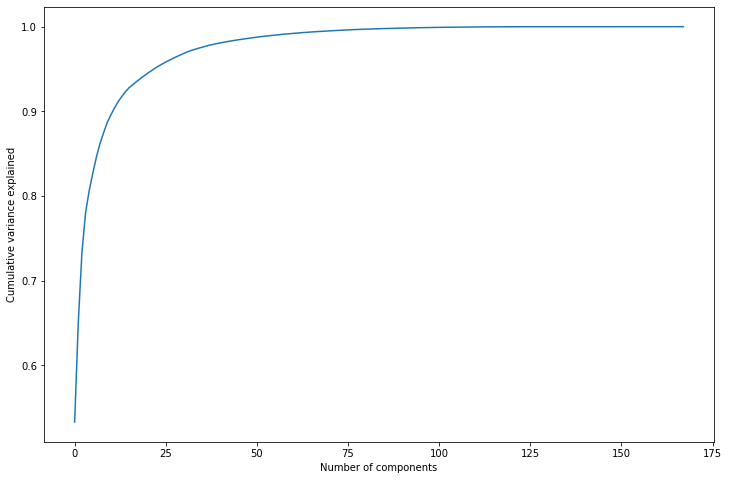

In [83]:
#Making the screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(var_cumu)
plt.xlabel('Number of components')
plt.ylabel("Cumulative variance explained")
plt.show()

So we will perform PCA with 30 components explaining above 96% of variance

In [84]:
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=30)

In [85]:
X_train_pca = pca_final.fit_transform(X_train)
X_train_pca.shape

(38468, 30)

In [86]:
corrmat = np.corrcoef(X_train_pca.transpose())

In [87]:
corrmat.shape

(30, 30)

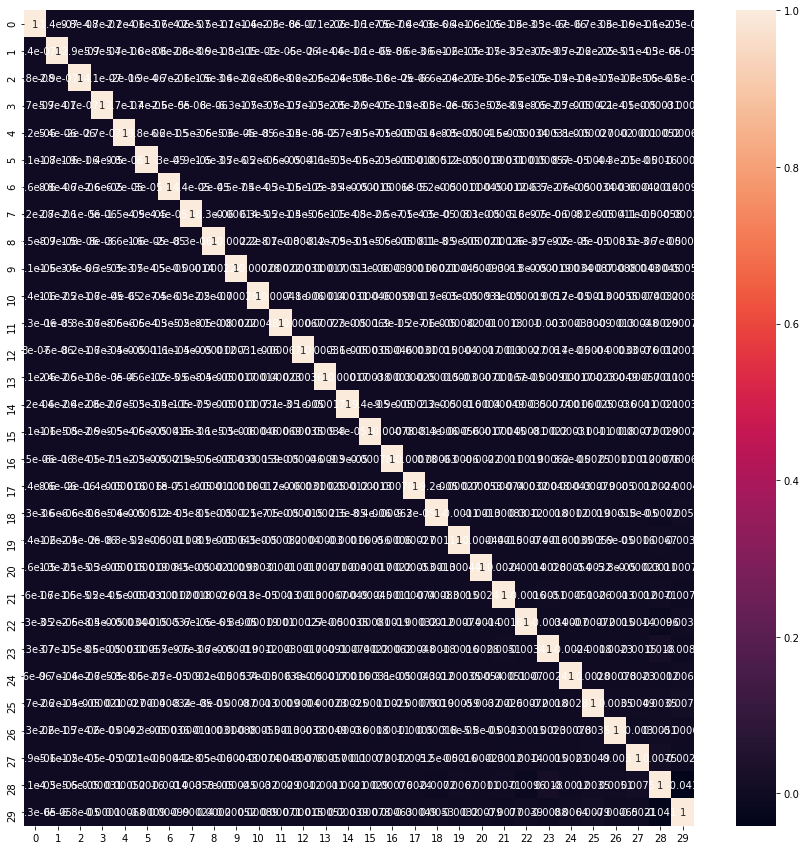

In [88]:
#Plotting the heatmap of the corr matrix
plt.figure(figsize=[15,15])
sns.heatmap(corrmat, annot=True)

it is good to check the maximum and minmum correlation between the PCs instead of analysing the cluttered heatmap.

In [89]:
# 1s -> 0s in diagonals
corrmat_nodiag = corrmat - np.diagflat(corrmat.diagonal())
print("max corr:",corrmat_nodiag.max(), ", min corr: ", corrmat_nodiag.min(),)


max corr: 0.017999803028323696 , min corr:  -0.04135666675960629


we see that correlations are indeed very close to 0

In [90]:
# Applying the transformation on the test set:
X_test_pca = pca_final.transform(X_test)
X_test_pca.shape

(8972, 30)

### A. Logistic Regression:

In [91]:
import statsmodels.api as sm
#Logistic regression model
X_train_sm = sm.add_constant(X_train_pca)
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()

In [92]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

array([0.7037277 , 0.00568129, 0.12074907, 0.02462661, 0.85363295,
       0.91757598, 0.54369779, 0.20070834, 0.65653747, 0.2045574 ])

In [93]:
y_train_pred_final = pd.DataFrame({'Churn':y_train.values, 'Conv_Prob':y_train_pred})
y_train_pred_final.head()

,Churn,Conv_Prob
0,0,0.703728
1,0,0.005681
2,0,0.120749
3,0,0.024627
4,0,0.853633


In [94]:
y_train_pred_final['predicted'] = y_train_pred_final.Conv_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Churn,Conv_Prob,predicted
0,0,0.703728,1
1,0,0.005681,0
2,0,0.120749,0
3,0,0.024627,0
4,0,0.853633,1


In [95]:
# Checking accuracy
from sklearn import metrics
print(metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted))

0.8272850161172923


In [96]:
from sklearn import metrics
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted )
print(confusion)

[[15600  3634]
 [ 3010 16224]]


In [97]:
#Labeling the matrix
# Actual/Predicted     not_conv    conv
        # not_conv       15600     3634
        # conv           3010      16224

In [98]:
TP = confusion[1,1] 
TN = confusion[0,0] 
FP = confusion[0,1] 
FN = confusion[1,0] 

In [99]:
# Sensitivity of logistic regression model
TP / float(TP+FN)

0.8435062909431216

In [100]:
# Specificity
TN / float(TN+FP)

0.8110637412914631

In [101]:
# Positive predictive value 
print (TP / float(TP+FP))

0.8170007050055393


In [102]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8382590005373455


In [103]:
from sklearn.metrics import classification_report
print(classification_report(y_train_pred_final.Churn, y_train_pred_final.predicted))

              precision    recall  f1-score   support

           0       0.84      0.81      0.82     19234
           1       0.82      0.84      0.83     19234

    accuracy                           0.83     38468
   macro avg       0.83      0.83      0.83     38468
weighted avg       0.83      0.83      0.83     38468



So it can be seen that with a cutoff value of 0.5 the precision is coming as 79% , recall 69% and accuracy 81%. We will check the metrics for different cutoff values in later part of the notebook and will arrive at a proper cutoff value.

#### Plotting the ROC Curve
An ROC curve demonstrates several things:

It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity). <br>
The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test. <br>
The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [104]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [105]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Churn, y_train_pred_final.Conv_Prob, drop_intermediate = False )

In [106]:
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
optimal_threshold

0.5713827060856115

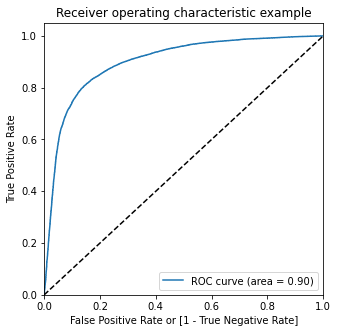

In [107]:
draw_roc(y_train_pred_final.Churn, y_train_pred_final.Conv_Prob)

In [108]:
print("roc_auc_score : {:2.2f}".format(metrics.roc_auc_score(y_train_pred_final.Churn, y_train_pred_final.Conv_Prob)))

roc_auc_score : 0.90


In [109]:
# Finding Optimal Cutoff Point
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conv_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Churn,Conv_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.703728,1,1,1,1,1,1,1,1,1,0,0
1,0,0.005681,0,1,0,0,0,0,0,0,0,0,0
2,0,0.120749,0,1,1,0,0,0,0,0,0,0,0
3,0,0.024627,0,1,0,0,0,0,0,0,0,0,0
4,0,0.853633,1,1,1,1,1,1,1,1,1,1,0


In [110]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.500000  1.000000  0.000000
0.1   0.1  0.684725  0.977280  0.392170
0.2   0.2  0.749740  0.951492  0.547988
0.3   0.3  0.788707  0.919310  0.658105
0.4   0.4  0.815119  0.885151  0.745087
0.5   0.5  0.827285  0.843506  0.811064
0.6   0.6  0.830301  0.789695  0.870906
0.7   0.7  0.815795  0.719871  0.911719
0.8   0.8  0.776853  0.607050  0.946657
0.9   0.9  0.612899  0.244151  0.981647


#### Finding Optimal Cutoff Point
Since recall or sensitivity is a much more important metrics for churn prediction. A trade off between sensitivity(or recall) and specificity is to be considered in doing so. We will try adjusting the probability threshold which shall lead to higher sensitivity or recall rate.

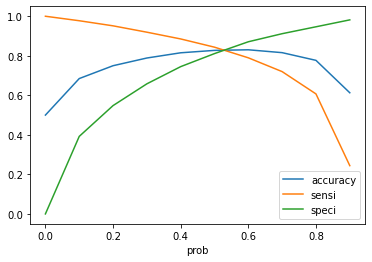

In [111]:
# Plotting accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

From the curve above, 0.53 is the optimum point. At this point there is a balance of sensitivity, specificity and accuracy.

In [112]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conv_Prob.map( lambda x: 1 if x > 0.53 else 0)
y_train_pred_final.head(10)

,Churn,Conv_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.703728,1,1,1,1,1,1,1,1,1,0,0,1
1,0,0.005681,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.120749,0,1,1,0,0,0,0,0,0,0,0,0
3,0,0.024627,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0.853633,1,1,1,1,1,1,1,1,1,1,0,1
5,1,0.917576,1,1,1,1,1,1,1,1,1,1,1,1
6,0,0.543698,1,1,1,1,1,1,1,0,0,0,0,1
7,0,0.200708,0,1,1,1,0,0,0,0,0,0,0,0
8,0,0.656537,1,1,1,1,1,1,1,1,0,0,0,1
9,0,0.204557,0,1,1,1,0,0,0,0,0,0,0,0


In [113]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.final_predicted)

0.8306904440054071

In [114]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.final_predicted )
confusion2

array([[15979,  3255],
       [ 3258, 15976]], dtype=int64)

In [115]:
TP = confusion2[1,1]  
TN = confusion2[0,0]
FP = confusion2[0,1]
FN = confusion2[1,0]

In [116]:
from sklearn.metrics import precision_score, recall_score

# ROC_AUC_Score
print("roc_auc_score : {:2.2f}".format(metrics.roc_auc_score(y_train_pred_final.Churn, y_train_pred_final.Conv_Prob)))

# Sensitivity of our logistic regression model
print("Sensitivity:", TP / float(TP+FN))

# Specificity
print("Specificity:",TN / float(TN+FP))

#Precision
print("Precision:", precision_score(y_train_pred_final.Churn, y_train_pred_final.final_predicted))

#Recall
print("Recall:", recall_score(y_train_pred_final.Churn, y_train_pred_final.final_predicted))

# Calculate false postive rate - predicting churn when customer does not have churned
print("false postive rate:",FP/ float(TN+FP))

# Positive predictive value 
print ("Positive predictive value:",TP / float(TP+FP))

# Negative predictive value
print ("Negative predictive value:",TN / float(TN+ FN))



roc_auc_score : 0.90
Sensitivity: 0.830612457107206
Specificity: 0.8307684309036082
Precision: 0.8307420310956268
Recall: 0.830612457107206
false postive rate: 0.1692315690963918
Positive predictive value: 0.8307420310956268
Negative predictive value: 0.8306388730051464


In [117]:
from sklearn.metrics import classification_report
print(classification_report(y_train_pred_final.Churn, y_train_pred_final.predicted))

              precision    recall  f1-score   support

           0       0.84      0.81      0.82     19234
           1       0.82      0.84      0.83     19234

    accuracy                           0.83     38468
   macro avg       0.83      0.83      0.83     38468
weighted avg       0.83      0.83      0.83     38468



Hence with cutoff value 0.53 we can see that we are getting a good model with accuracy 83% , precision 83% and recall 83%.

In [118]:
#### Making predictions on the test set

In [119]:
X_test_sm = sm.add_constant(X_test_pca)

In [120]:
y_test_pred = res.predict(X_test_sm)

In [121]:
y_test_pred[:10]

array([0.43481263, 0.59248524, 0.36583973, 0.28494599, 0.15393196,
       0.11073677, 0.03841406, 0.31319885, 0.31018073, 0.06344884])

In [122]:
# Converting y_pred to a df
y_pred_1 = pd.DataFrame(y_test_pred)

In [123]:
y_pred_1.head()

,0
0,0.434813
1,0.592485
2,0.365840
3,0.284946
4,0.153932


In [124]:
y_test.head(10)

4265     0
29221    0
974      0
1602     0
10225    0
28358    0
15763    0
29075    0
14665    0
4719     0
Name: churn, dtype: category
Categories (2, int64): [0, 1]

In [125]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [126]:
# Removing index for both dataframes  
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [127]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [128]:
y_pred_final.head()

,churn,0
0,0,0.434813
1,0,0.592485
2,0,0.365840
3,0,0.284946
4,0,0.153932


In [129]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Conv_Prob'})

In [130]:
y_pred_final.head()

,churn,Conv_Prob
0,0,0.434813
1,0,0.592485
2,0,0.365840
3,0,0.284946
4,0,0.153932


In [131]:
y_pred_final['final_predicted'] = y_pred_final.Conv_Prob.map(lambda x: 1 if x > 0.53 else 0)

In [132]:
y_pred_final.head()

,churn,Conv_Prob,final_predicted
0,0,0.434813,0
1,0,0.592485,1
2,0,0.365840,0
3,0,0.284946,0
4,0,0.153932,0


In [133]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.churn, y_pred_final.final_predicted)

0.8330361123495319

In [134]:
confusion2 = metrics.confusion_matrix(y_pred_final.churn, y_pred_final.final_predicted )
confusion2

array([[6898, 1356],
       [ 142,  576]], dtype=int64)

In [135]:
TP = confusion2[1,1] 
TN = confusion2[0,0] 
FP = confusion2[0,1] 
FN = confusion2[1,0] 

In [136]:
from sklearn.metrics import precision_score, recall_score

# ROC_AUC_Score
print("roc_auc_score : {:2.2f}".format(metrics.roc_auc_score(y_pred_final.churn, y_pred_final.final_predicted)))


# Sensitivity of our logistic regression model
print("Sensitivity:", TP / float(TP+FN))

# Specificity
print("Specificity:",TN / float(TN+FP))

#Precision
print("Precision:", precision_score(y_pred_final.churn, y_pred_final.final_predicted))

#Recall
print("Recall:", recall_score(y_pred_final.churn, y_pred_final.final_predicted))



roc_auc_score : 0.82
Sensitivity: 0.8022284122562674
Specificity: 0.8357160164768597
Precision: 0.2981366459627329
Recall: 0.8022284122562674


The resulting model, after PCA and logistic regression (with optimal cutoff setting) has a right balance of different metrics score for sensitivity, specificity and Roc Accuracy on the train and test set.

* train sensitivity : 83.06%, train accuracy : 83.06%
* test sensitivity : 80.22%, test accuracy : 83.30%

## B. Decision Tree


In [137]:
import sklearn.preprocessing
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [138]:
from sklearn.tree import DecisionTreeClassifier
dt0 = DecisionTreeClassifier(class_weight='balanced',
                             max_features='auto',
                             min_samples_split=100,
                             min_samples_leaf=100,
                             max_depth=6,
                             random_state=10)


In [139]:
dt0.fit(X_train_pca, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=6,
                       max_features='auto', min_samples_leaf=100,
                       min_samples_split=100, random_state=10)

In [140]:
#Predict training set:
dtrain_predictions = dt0.predict(X_train_pca)
dtrain_predprob = dt0.predict_proba(X_train_pca)[:,1]

In [141]:
#Perform cross-validation:(5-fold)
from sklearn.model_selection import cross_val_score
cv_score = cross_val_score(dt0, X_train_pca, y_train, cv=5, scoring='roc_auc')
 

In [142]:
#Print model report:
print ("\nModel Report")
print ("Accuracy : %.4g" % metrics.roc_auc_score(y_train, dtrain_predictions))
print ("Recall/Sensitivity : %.4g" % metrics.recall_score(y_train, dtrain_predictions))
print ("AUC Score (Train): %f" % metrics.roc_auc_score(y_train, dtrain_predprob))
print ("CV Score : Mean - %.7g | Std - %.7g | Min - %.7g | Max - %.7g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))


Model Report
Accuracy : 0.7394
Recall/Sensitivity : 0.7845
AUC Score (Train): 0.811800
CV Score : Mean - 0.8168664 | Std - 0.01167834 | Min - 0.8054368 | Max - 0.839163


In [143]:
# make predictions
pred_probs_test = dt0.predict(X_test_pca)


In [144]:
confusion = metrics.confusion_matrix(y_test, pred_probs_test)
confusion

array([[5644, 2610],
       [ 203,  515]], dtype=int64)

In [145]:

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [146]:
from sklearn.metrics import precision_score, recall_score

# ROC_AUC_Score
print("roc_auc_score : {:2.2f}".format(metrics.roc_auc_score(y_test, pred_probs_test)))


# Sensitivity of our logistic regression model
print("Sensitivity:", TP / float(TP+FN))

# Specificity
print("Specificity:",TN / float(TN+FP))

#Precision
print("Precision:", precision_score(y_test, pred_probs_test))

#Recall
print("Recall:", recall_score(y_test, pred_probs_test))



roc_auc_score : 0.70
Sensitivity: 0.7172701949860725
Specificity: 0.6837896777320087
Precision: 0.1648
Recall: 0.7172701949860725


In [148]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': range(5,15,3),
    'min_samples_leaf': range(100, 400, 50),
    'min_samples_split': range(100, 400, 100),
    'max_features': [8,10,15]
}
# Create a based model
dt = DecisionTreeClassifier(class_weight='balanced',random_state=10)
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = dt, param_grid = param_grid, 
                          cv = 3, n_jobs = 4,verbose = 1,scoring="f1_weighted")

In [149]:
#Fit the grid search to the data
grid_search.fit(X_train_pca, y_train)

Fitting 3 folds for each of 216 candidates, totalling 648 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   11.6s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   27.2s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:   55.8s
[Parallel(n_jobs=4)]: Done 648 out of 648 | elapsed:  1.4min finished


GridSearchCV(cv=3,
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              random_state=10),
             n_jobs=4,
             param_grid={'max_depth': range(5, 15, 3),
                         'max_features': [8, 10, 15],
                         'min_samples_leaf': range(100, 400, 50),
                         'min_samples_split': range(100, 400, 100)},
             scoring='f1_weighted', verbose=1)

In [150]:
# printing the optimal accuracy score and hyperparameters
print('We can get recall of',grid_search.best_score_,'using',grid_search.best_params_)

We can get recall of 0.8035550733439116 using {'max_depth': 14, 'max_features': 15, 'min_samples_leaf': 100, 'min_samples_split': 100}


In [151]:
# model with the best hyperparameters
dt_final = DecisionTreeClassifier(class_weight='balanced',
                             max_depth=14,
                             min_samples_leaf=100, 
                             min_samples_split=100,
                             max_features=15,
                             random_state=10)

In [152]:
dt_final.fit(X_train_pca, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=14, max_features=15,
                       min_samples_leaf=100, min_samples_split=100,
                       random_state=10)

In [153]:
#Predict training set:
dtrain_predictions = dt_final.predict(X_train_pca)
dtrain_predprob = dt_final.predict_proba(X_train_pca)[:,1]

In [154]:
#Perform cross-validation:(5-fold)
from sklearn.model_selection import cross_val_score
cv_score = cross_val_score(dt_final, X_train_pca, y_train, cv=5, scoring='roc_auc')


In [155]:
#Print model report:
print ("\nModel Report")
print ("Accuracy : %.4g" % metrics.roc_auc_score(y_train, dtrain_predictions))
print ("Recall/Sensitivity : %.4g" % metrics.recall_score(y_train, dtrain_predictions))
print ("AUC Score (Train): %f" % metrics.roc_auc_score(y_train, dtrain_predprob))
print ("CV Score : Mean - %.7g | Std - %.7g | Min - %.7g | Max - %.7g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))


Model Report
Accuracy : 0.8348
Recall/Sensitivity : 0.8418
AUC Score (Train): 0.916827
CV Score : Mean - 0.8898858 | Std - 0.006329901 | Min - 0.8801668 | Max - 0.8980628


In [156]:
# make predictions
pred_probs_test = dt_final.predict(X_test_pca)


In [157]:
confusion2 = metrics.confusion_matrix(y_test, pred_probs_test)
confusion2

array([[6682, 1572],
       [ 215,  503]], dtype=int64)

In [158]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [159]:
from sklearn.metrics import precision_score, recall_score

# ROC_AUC_Score
print("roc_auc_score : {:2.2f}".format(metrics.roc_auc_score(y_test, pred_probs_test)))


# Sensitivity of our logistic regression model
print("Sensitivity:", TP / float(TP+FN))

# Specificity
print("Specificity:",TN / float(TN+FP))

#Precision
print("Precision:", precision_score(y_test, pred_probs_test))

#Recall
print("Recall:", recall_score(y_test, pred_probs_test))


roc_auc_score : 0.76
Sensitivity: 0.7005571030640668
Specificity: 0.8095468863581294
Precision: 0.24240963855421688
Recall: 0.7005571030640668


In [ ]:
# classification report
print(classification_report(y_test,pred_probs_test))

Even after hyperparameter tuning for the Decision Tree. The recall rate is 70% which is not very significant to predict the churn.

Let's see if we can achive a better Recall rate by deciding an optimal cut-off for the model to predict churn.

In [160]:
# predicting churn with default cut-off 0.5
cut_off_prob = 0.5

pred_probs = dt_final.predict_proba(X_train_pca)[:,1]
y_train_df= pd.DataFrame({'churn':y_train, 'churn_Prob':pred_probs})
y_train_df['final_predicted'] = y_train_df.churn_Prob.map( lambda x: 1 if x > cut_off_prob else 0)
y_train_df.head()

,churn,churn_Prob,final_predicted
0,0,0.415929,0
1,0,0.000000,0
2,0,0.006369,0
3,0,0.237705,0
4,0,0.770642,1


In [161]:
confusion3 = metrics.confusion_matrix(y_train_df.churn, y_train_df.final_predicted)
confusion3

array([[15923,  3311],
       [ 3042, 16192]], dtype=int64)

In [162]:
TP = confusion3[1,1] # true positive 
TN = confusion3[0,0] # true negatives
FP = confusion3[0,1] # false positives
FN = confusion3[1,0] # false negatives

In [163]:
# ROC_AUC_Score
print("roc_auc_score : {:2.2f}".format(metrics.roc_auc_score(y_train_df.churn, y_train_df.final_predicted)))

# Sensitivity of our logistic regression model
print("Sensitivity:", TP / float(TP+FN))

# Specificity
print("Specificity:",TN / float(TN+FP))

#Precision
print("Precision:", precision_score(y_train_df.churn, y_train_df.final_predicted))

#Recall
print("Recall:", recall_score(y_train_df.churn, y_train_df.final_predicted))

# Calculate false postive rate - predicting churn when customer does not have churned
print("false postive rate:",FP/ float(TN+FP))

# Positive predictive value 
print ("Positive predictive value:",TP / float(TP+FP))

# Negative predictive value
print ("Negative predictive value:",TN / float(TN+ FN))


roc_auc_score : 0.83
Sensitivity: 0.8418425704481647
Specificity: 0.8278569200374337
Precision: 0.8302312464749013
Recall: 0.8418425704481647
false postive rate: 0.17214307996256628
Positive predictive value: 0.8302312464749013
Negative predictive value: 0.839599261798049


In [164]:
# Finding Optimal Cutoff Point
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_df[i]= y_train_df.final_predicted.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Churn,Conv_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.703728,1,1,1,1,1,1,1,1,1,0,0,1
1,0,0.005681,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.120749,0,1,1,0,0,0,0,0,0,0,0,0
3,0,0.024627,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0.853633,1,1,1,1,1,1,1,1,1,1,0,1


In [165]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.500000  1.000000  0.000000
0.1   0.1  0.684725  0.977280  0.392170
0.2   0.2  0.749740  0.951492  0.547988
0.3   0.3  0.788707  0.919310  0.658105
0.4   0.4  0.815119  0.885151  0.745087
0.5   0.5  0.827285  0.843506  0.811064
0.6   0.6  0.830301  0.789695  0.870906
0.7   0.7  0.815795  0.719871  0.911719
0.8   0.8  0.776853  0.607050  0.946657
0.9   0.9  0.612899  0.244151  0.981647


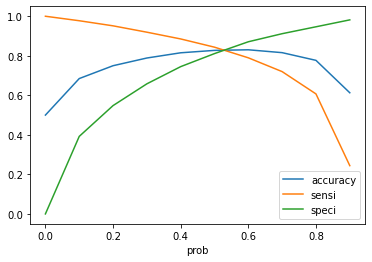

In [166]:
# Plotting accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [167]:
# predicting churn with default cut-off 0.58
cut_off_prob = 0.53

pred_probs = dt_final.predict_proba(X_train_pca)[:,1]
y_train_df= pd.DataFrame({'churn':y_train, 'churn_Prob':pred_probs})
y_train_df['final_predicted'] = y_train_df.churn_Prob.map( lambda x: 1 if x > cut_off_prob else 0)
y_train_df.head()

,churn,churn_Prob,final_predicted
0,0,0.415929,0
1,0,0.000000,0
2,0,0.006369,0
3,0,0.237705,0
4,0,0.770642,1


In [168]:
confusion4 = metrics.confusion_matrix(y_train_df.churn, y_train_df.final_predicted)
confusion4

array([[16363,  2871],
       [ 3507, 15727]], dtype=int64)

In [169]:
TP = confusion4[1,1] # true positive 
TN = confusion4[0,0] # true negatives
FP = confusion4[0,1] # false positives
FN = confusion4[1,0] # false negatives

In [170]:
# ROC_AUC_Score
print("roc_auc_score : {:2.2f}".format(metrics.roc_auc_score(y_train_df.churn, y_train_df.final_predicted)))

# Sensitivity of our logistic regression model
print("Sensitivity:", TP / float(TP+FN))

# Specificity
print("Specificity:",TN / float(TN+FP))

#Precision
print("Precision:", precision_score(y_train_df.churn, y_train_df.final_predicted))

#Recall
print("Recall:", recall_score(y_train_df.churn, y_train_df.final_predicted))

# Calculate false postive rate - predicting churn when customer does not have churned
print("false postive rate:",FP/ float(TN+FP))

# Positive predictive value 
print ("Positive predictive value:",TP / float(TP+FP))

# Negative predictive value
print ("Negative predictive value:",TN / float(TN+ FN))

roc_auc_score : 0.83
Sensitivity: 0.817666632005823
Specificity: 0.8507330768430904
Precision: 0.8456285622109905
Recall: 0.817666632005823
false postive rate: 0.14926692315690965
Positive predictive value: 0.8456285622109905
Negative predictive value: 0.8235027679919477


At 0.53 cut-off prob. there is a balance of sensitivity , specificity and accuracy.
Lets see how it performs on test data.

In [171]:
# predict
cut_off_prob = 0.53
pred_probs = dt_final.predict_proba(X_test_pca)[:,1]
y_test_df= pd.DataFrame({'churn':y_test, 'churn_Prob':pred_probs})

# Creating new column 'predicted' with 1 if Churn_Prob>0.5 else 0
y_test_df['final_predicted'] = y_test_df.churn_Prob.map( lambda x: 1 if x > cut_off_prob else 0)
y_test_df.head()

,churn,churn_Prob,final_predicted
4265,0,0.458716,0
29221,0,0.030769,0
974,0,0.728155,1
1602,0,0.493333,0
10225,0,0.007130,0


In [172]:
confusion5 = metrics.confusion_matrix(y_test_df.churn, y_test_df.final_predicted)
confusion5

array([[6883, 1371],
       [ 222,  496]], dtype=int64)

In [173]:
TP = confusion5[1,1] # true positive 
TN = confusion5[0,0] # true negatives
FP = confusion5[0,1] # false positives
FN = confusion5[1,0] # false negatives

In [174]:
# ROC_AUC_Score
print("roc_auc_score : {:2.2f}".format(metrics.roc_auc_score(y_test_df.churn, y_test_df.final_predicted)))

# Sensitivity of our logistic regression model
print("Sensitivity:", TP / float(TP+FN))

# Specificity
print("Specificity:",TN / float(TN+FP))

#Precision
print("Precision:", precision_score(y_test_df.churn, y_test_df.final_predicted))

#Recall
print("Recall:", recall_score(y_test_df.churn, y_test_df.final_predicted))

# Calculate false postive rate - predicting churn when customer does not have churned
print("false postive rate:",FP/ float(TN+FP))

# Positive predictive value 
print ("Positive predictive value:",TP / float(TP+FP))

# Negative predictive value
print ("Negative predictive value:",TN / float(TN+ FN))

roc_auc_score : 0.76
Sensitivity: 0.6908077994428969
Specificity: 0.8338987157741701
Precision: 0.2656668452062132
Recall: 0.6908077994428969
false postive rate: 0.1661012842258299
Positive predictive value: 0.2656668452062132
Negative predictive value: 0.9687543983110486


Decision tree after selecting optimal cut-off also is resulting in a model with
* Train Recall : 81.76% and Train Roc_auc_score : 83%
* Test Recall : 69.08% and Test Roc_auc_score : 76%

## C. XGBoost Classifier

In [178]:
!pip install xgboost

In [179]:
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
# Fitting the XGBClassifier
xgb1 = XGBClassifier(learning_rate =0.1,
                    n_estimators=1000,
                    max_depth=5,
                    min_child_weight=1,
                    gamma=0,
                    subsample=0.8,
                    colsample_bytree=0.8,
                    objective= 'binary:logistic',
                    nthread=4,
                    scale_pos_weight=1,
                    seed=27)

In [180]:
xgb1.fit(X_train_pca, y_train)

[20:07:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=1000, n_jobs=4, nthread=4, num_parallel_tree=1,
              random_state=27, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=27, subsample=0.8, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [181]:
def modelfit(alg, X_train, y_train, performCV=True, cv_folds=5):
    #Fit the algorithm on the data
    alg.fit(X_train, y_train)
        
    #Predict training set:
    dtrain_predictions = alg.predict(X_train)
    dtrain_predprob = alg.predict_proba(X_train)[:,1]
    
    #Perform cross-validation:
    if performCV:
        cv_score = cross_val_score(alg, X_train, y_train, cv=cv_folds, scoring='roc_auc')
    
    #Print model report:
    print ("\nModel Report")
    print ("Accuracy : %.4g" % metrics.roc_auc_score(y_train, dtrain_predictions))
    print ("Recall/Sensitivity : %.4g" % metrics.recall_score(y_train, dtrain_predictions))
    print ("AUC Score (Train): %f" % metrics.roc_auc_score(y_train, dtrain_predprob))
    
    if performCV:
        print ("CV Score : Mean - %.7g | Std - %.7g | Min - %.7g | Max - %.7g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))

In [182]:
#Predict training set:
dtrain_predictions = xgb1.predict(X_train_pca)
dtrain_predprob = xgb1.predict_proba(X_train_pca)[:,1]

In [ ]:
cv_score = cross_val_score(xgb1, X_train_pca, y_train, cv=5, scoring='roc_auc')

[20:12:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:14:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:16:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:18:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

In [ ]:
print ("\nModel Report")
print ("Accuracy : %.4g" % metrics.roc_auc_score(y_train, dtrain_predictions))
print ("Recall/Sensitivity : %.4g" % metrics.recall_score(y_train, dtrain_predictions))
print ("AUC Score (Train): %f" % metrics.roc_auc_score(y_train, dtrain_predprob))
print ("CV Score : Mean - %.7g | Std - %.7g | Min - %.7g | Max - %.7g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))

In [ ]:
# Hyperparameter tunning for the XGBClassifer
param_test1 = {'max_depth':range(3,10,2),'min_child_weight':range(1,6,2)}
gsearch1 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=5,
                                                  min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
                                                  objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27),
                        param_grid = param_test1, scoring='f1',n_jobs=4,iid=False, cv=3)
gsearch1.fit(X_train_pca, y_train)

In [ ]:
gsearch1.best_params_, gsearch1.best_score_

In [ ]:
# Some more hyperparameter tunning for the XGBClassifer
param_test2 = param_test3 = {'gamma':[i/10.0 for i in range(0,5)]}
gsearch2 = GridSearchCV(estimator = XGBClassifier( learning_rate=0.1, n_estimators=140, max_depth=9,
                                                  min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
                                                  objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
                        param_grid = param_test2, scoring='f1',n_jobs=4,iid=False, cv=3)
gsearch2.fit(X_train_pca, y_train)

In [ ]:
gsearch2.best_params_, gsearch2.best_score_

In [ ]:
# Final XGBClassifier
xgb2 = XGBClassifier( learning_rate=0.1, n_estimators=140, max_depth=9,
                     min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
                     objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27)

In [ ]:
# Fit Train data
xgb2.fit(X_train_pca, y_train)

In [ ]:
#Predict training set:
dtrain_predictions = xgb2.predict(X_train_pca)
dtrain_predprob = xgb2.predict_proba(X_train_pca)[:,1]

In [ ]:
cv_score = cross_val_score(xgb2, X_train_pca, y_train, cv=5, scoring='roc_auc')

In [ ]:
print ("\nModel Report")
print ("Accuracy : %.4g" % metrics.roc_auc_score(y_train, dtrain_predictions))
print ("Recall/Sensitivity : %.4g" % metrics.recall_score(y_train, dtrain_predictions))
print ("AUC Score (Train): %f" % metrics.roc_auc_score(y_train, dtrain_predprob))
print ("CV Score : Mean - %.7g | Std - %.7g | Min - %.7g | Max - %.7g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))

In [ ]:
# Prediction on Test data
dtest_predictions = xgb2.predict(X_test_pca)

In [ ]:
# Model evaluation on Test data
confusion = metrics.confusion_matrix(y_test, dtest_predictions)

In [ ]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [ ]:
print("Roc_auc_score : {}".format(metrics.roc_auc_score(y_test, dtest_predictions)))
# Let's see the sensitivity of our logistic regression model
print('Sensitivity/Recall : {}'.format(TP / float(TP+FN)))
# Let us calculate specificity
print('Specificity: {}'.format(TN / float(TN+FP)))
# Calculate false postive rate - predicting churn when customer does not have churned
print('False Positive Rate: {}'.format(FP/ float(TN+FP)))
# positive predictive value 
print('Positive predictive value: {}'.format(TP / float(TP+FP)))
# Negative predictive value
print('Negative Predictive value: {}'.format(TN / float(TN+ FN)))
# sklearn precision score value 
print('sklearn precision score value: {}'.format(metrics.precision_score(y_test, dtest_predictions)))

XGBoost after selecting optimal cut-off also is resulting in a model with
* Train Recall : 99.89% and Train Roc_auc_score : 99.98%
* Test Recall : 59.33% and Test Roc_auc_score : 76.10%

So after builiding three different models (using Logistic Regression, Decision Trees and XGBoost algorithms) we can conclude that **for better prediction our final model used will be Logistic Regression.**

As the selected model, after PCA and logistic regression (with optimal cutoff setting) has a right balance of different metrics score for sensitivity, specificity and Roc Accuracy on the train and test set.

**train sensitivity : 83.06%, train accuracy : 83.06%**<br>
**test sensitivity : 80.22%, test accuracy : 83.30%**

In [ ]:
rf.fit(X_train, y_train)